# CHARMI YASHWANT KANANI

# The Sparks Foundation
# Domain : Data Science & Business Analytics
# Task 6 : Prediction using Decision Tree Algorithm - Iris Dataset

In [1]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn import tree

In [2]:
# Importing the dataset
df = pd.read_csv('Iris.csv')

In [3]:
# Shape of the dataset
df.shape

(150, 6)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df = df.set_index('Id')

In [6]:
# Deriving insights from the data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


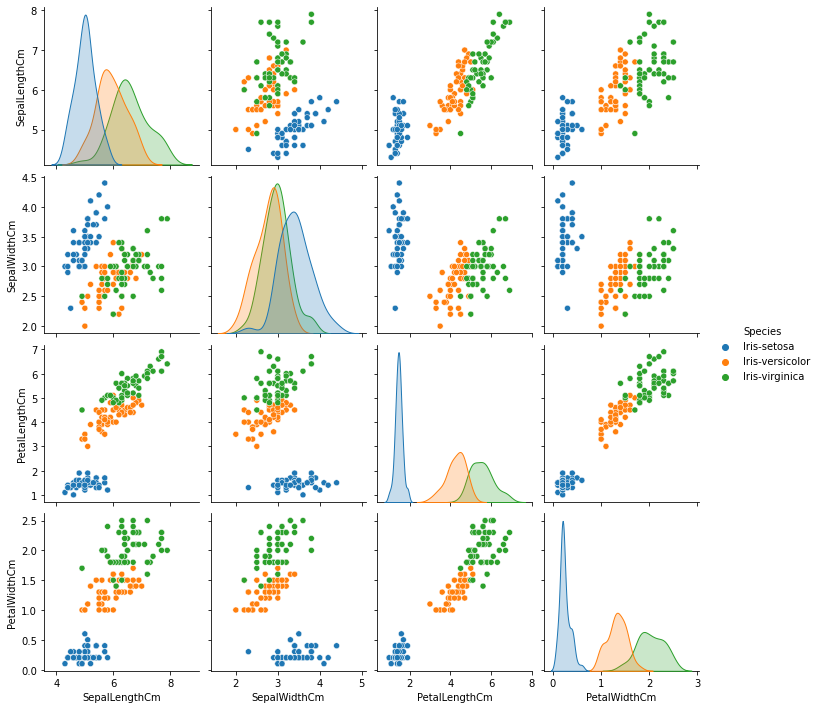

In [8]:
# Data Visualization
sns.pairplot(df, hue = 'Species')
# From the pairplot, it can be observed that one of the Species is clearly separable while the other two overlap.

<AxesSubplot:>

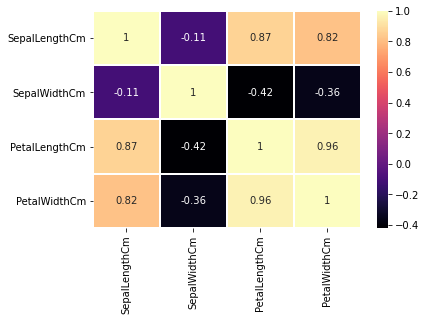

In [9]:
# Identifying Correlation
sns.heatmap(df.corr(),cmap = 'magma', linecolor = 'white', linewidths = 1, annot = True)

# The Lighter ones have a high positive correlation while the darker ones have a  negative correlation. 

# For example, Petal Length and Petal Width have a high positive correlation.

In [10]:
# Encoding the target variable - Species
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
Species = enc.fit_transform(df['Species'])
df['Species'] = Species

In [11]:
# Verifying the class imbalance
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [12]:
# Assigning the variables
X = df.drop('Species',axis=1)
y = df['Species']

In [13]:
#Splitting the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
# Importing the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [15]:
# Fitting the model
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
# Predicting the target variable
predictions = dtree.predict(X_test)

In [17]:
# Accuracy of the model
Accuracy = metrics.accuracy_score(y_test,predictions)*100
print("Decision Tree Classifier Accuracy (in %):", Accuracy)

Decision Tree Classifier Accuracy (in %): 100.0


In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


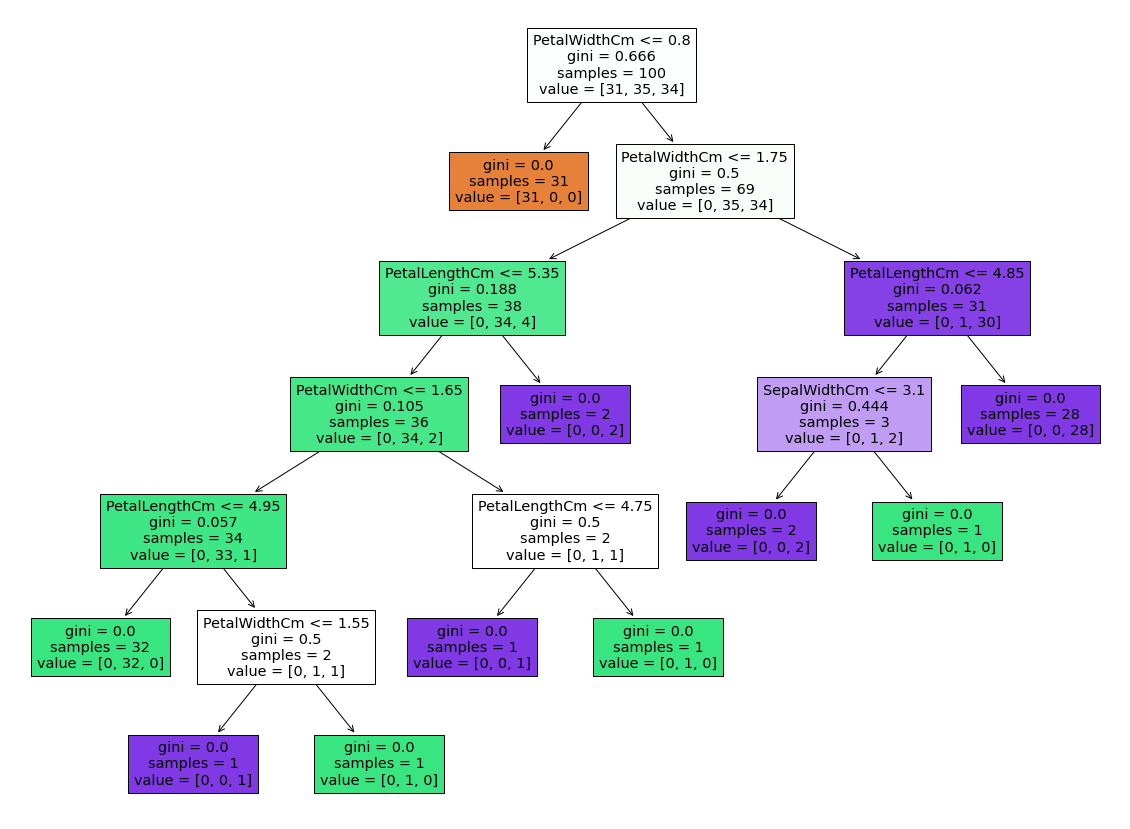

In [19]:
# Visualizing the tree
fig = plt.figure(figsize=(20,15))
img = tree.plot_tree(dtree, feature_names= X.columns, filled=True)


In [20]:
# From this, it can be observed how Decision Tree Classifier can be implemented for predicting the target variable
# based on the features. Visualizing the Decision Tree helps in identification of root and the leaf nodes.